In [21]:
import pandas as pd
import numpy as np
from fbprophet import Prophet
import matplotlib.pyplot  as plt
from multiprocessing import Pool, cpu_count
from tqdm.notebook import tqdm


In [1]:

def rnd_timeserie(min_date, max_date):
    time_index = pd.date_range(min_date, max_date)
    dates = (pd.DataFrame({'ds': pd.to_datetime(time_index.values)},
                          index=range(len(time_index))))
    y = np.random.random_sample(len(dates))*10
    dates['y'] = y
    return dates

In [2]:

def run_prophet(timeserie):
    model = Prophet(yearly_seasonality=False,daily_seasonality=False)
    model.fit(timeserie)
    forecast = model.make_future_dataframe(periods=90, include_history=False)
    forecast = model.predict(forecast)
    return forecast

In [3]:
series = [rnd_timeserie('2018-01-01','2018-12-30') for x in range(0,500)]

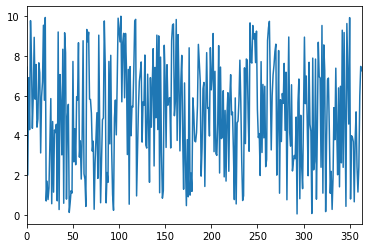

In [11]:
series[0]['y'].plot();

In [13]:
%%time
f = run_prophet(series[0])
f.head()

CPU times: user 1.42 s, sys: 4.69 ms, total: 1.43 s
Wall time: 1.42 s


### Direct proseccing prophet

In [20]:
%%time
result = list(map(lambda timeserie: run_prophet(timeserie), tqdm(series)))

/home/mrmopoz/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning:

This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`




CPU times: user 11min 51s, sys: 710 ms, total: 11min 52s
Wall time: 11min 50s


### Multiprocessing prophet

In [23]:
%%time
p = Pool(cpu_count())
predictions = list(tqdm(p.imap(run_prophet, series), total=len(series)))
p.close()
p.join()


CPU times: user 1.6 s, sys: 176 ms, total: 1.78 s
Wall time: 2min 33s
